# Mall customers Segmentation / Clustering

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [21]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [23]:
df.shape

(200, 5)

In [24]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
df.duplicated().sum()

0

In [28]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [29]:
df.drop(columns=["CustomerID"],axis=1,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [31]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Gender'], dtype='object')

Numerical type columns:
Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [32]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [33]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [34]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Gender']
Non-Categorical Features: []
Discrete Features: []
Continuous Features: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


##Visualizations

In [36]:
for i in categorical:
  print(i)
  print(df[i].unique())
  print()

Gender
['Male' 'Female']



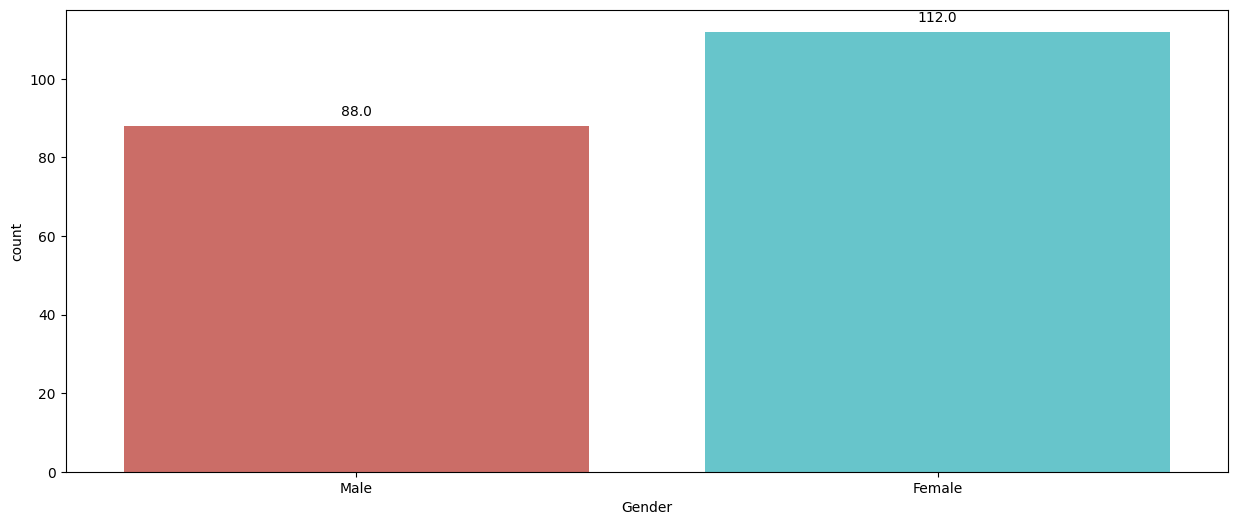

In [37]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls') #palette means color


    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

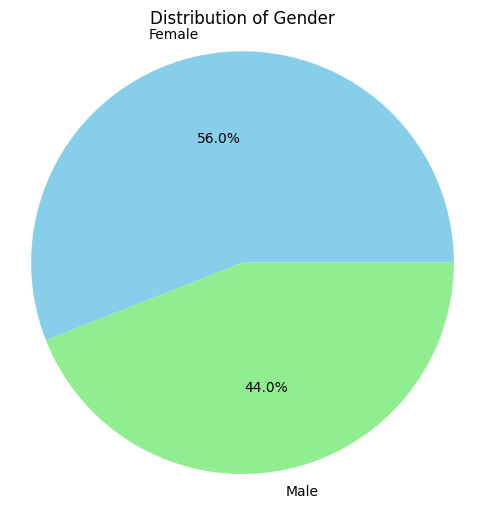

In [39]:
for i in categorical:
    plt.figure(figsize=(6,6))
    counts = df[i].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    plt.title(f'Distribution of {i}')
    plt.axis('equal')
    plt.show()

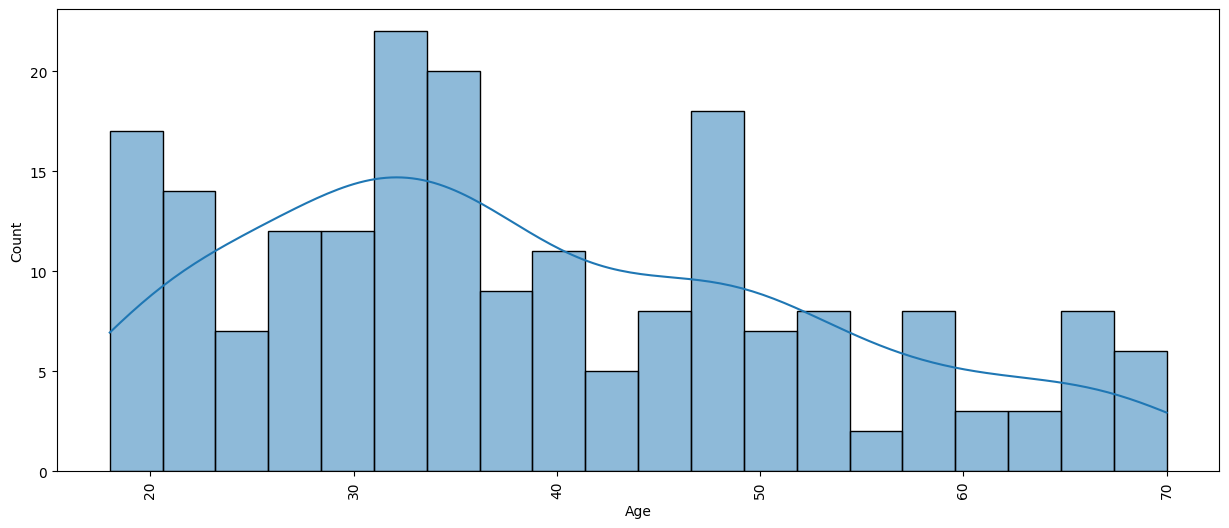

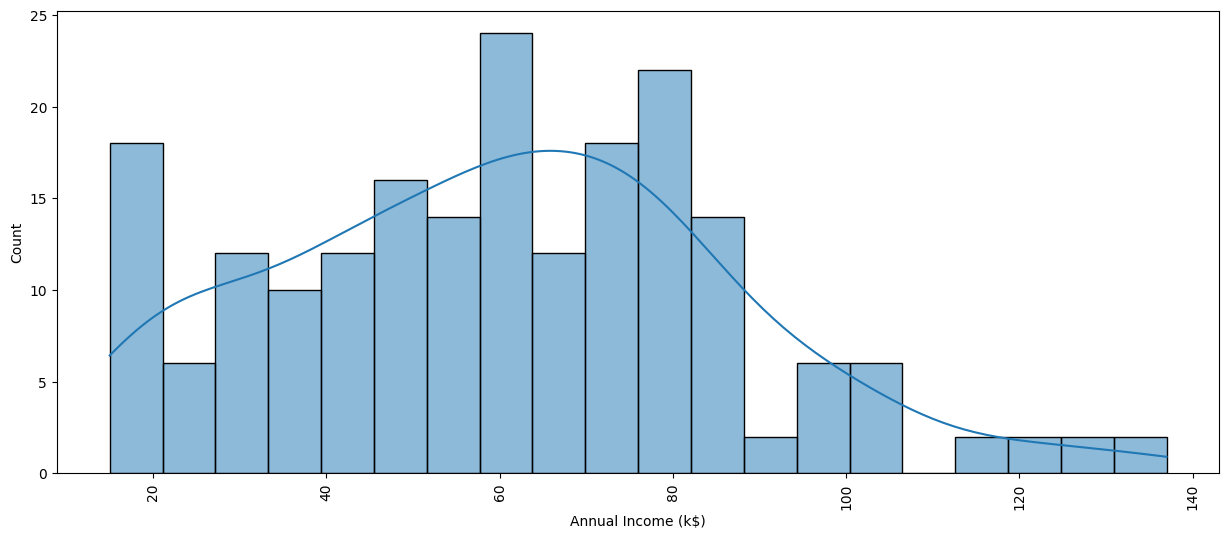

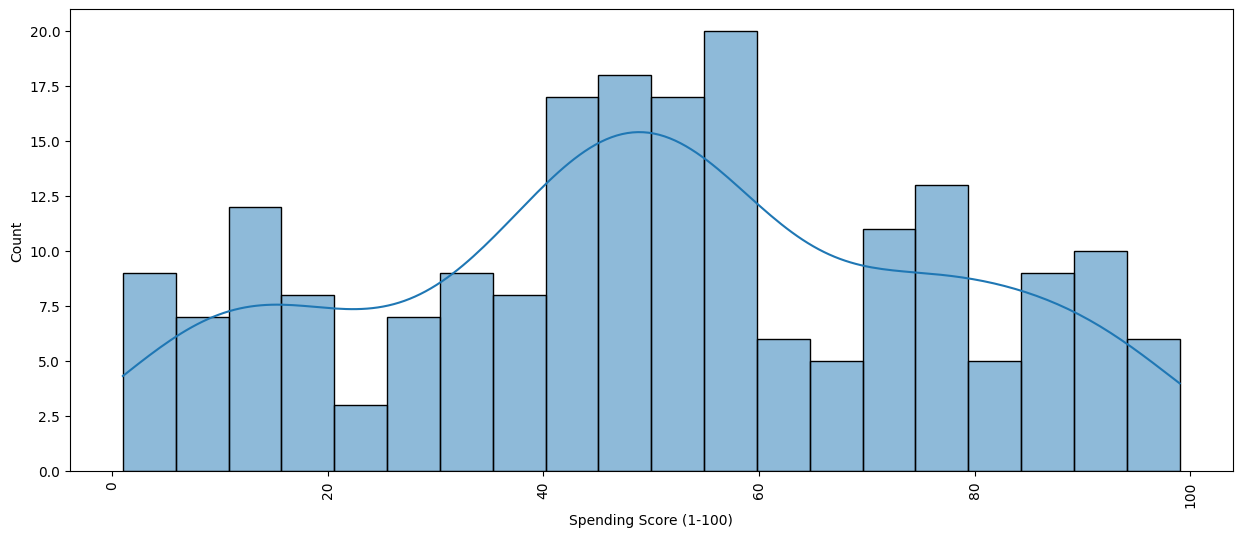

In [47]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

ValueError: could not convert string to float: 'Male'

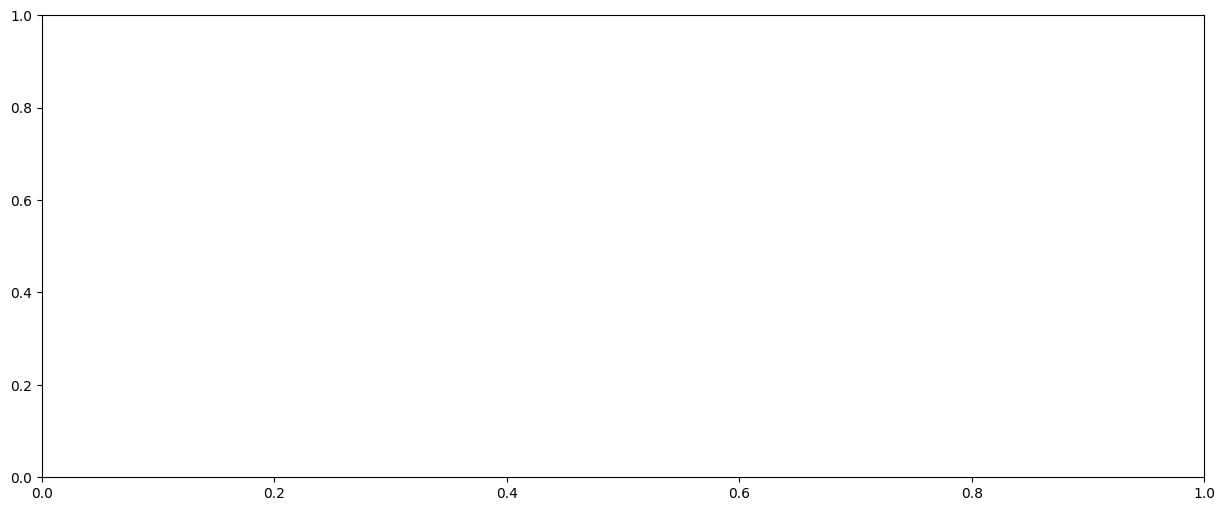

In [43]:
for i in categorical:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i])
    plt.xticks(rotation = 90)
    plt.show()

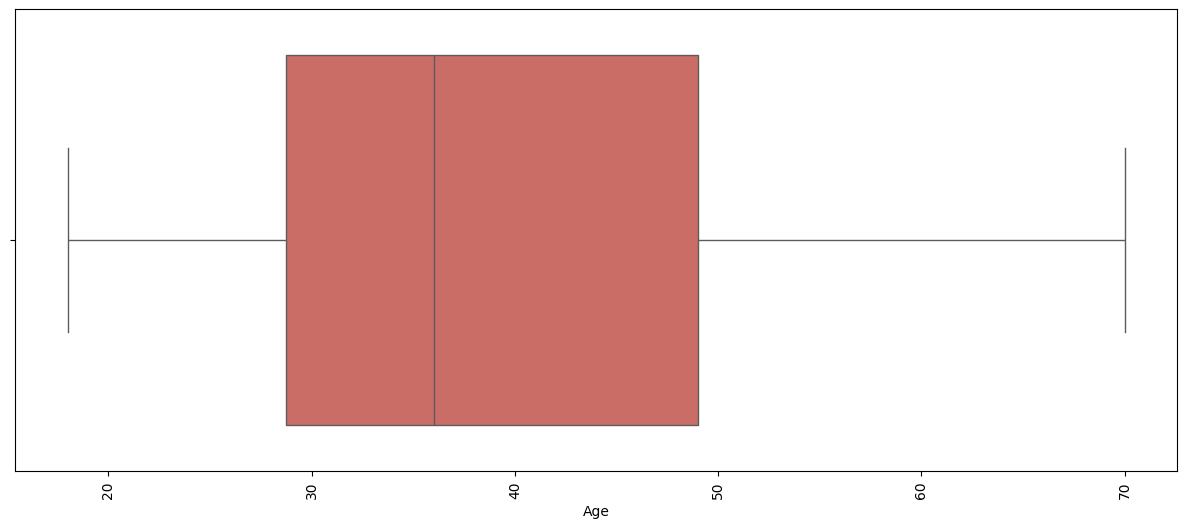

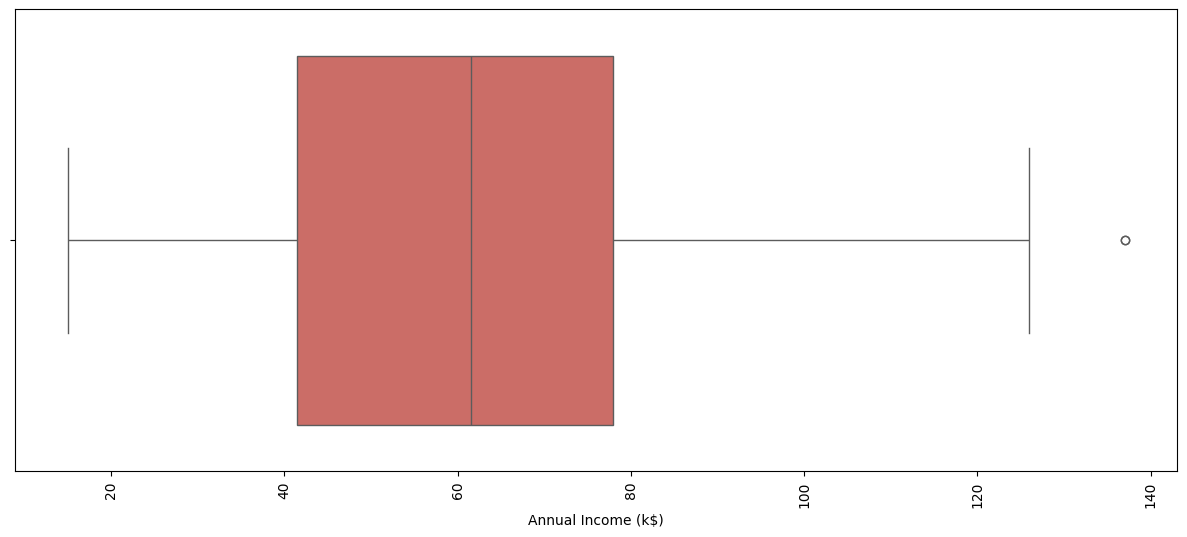

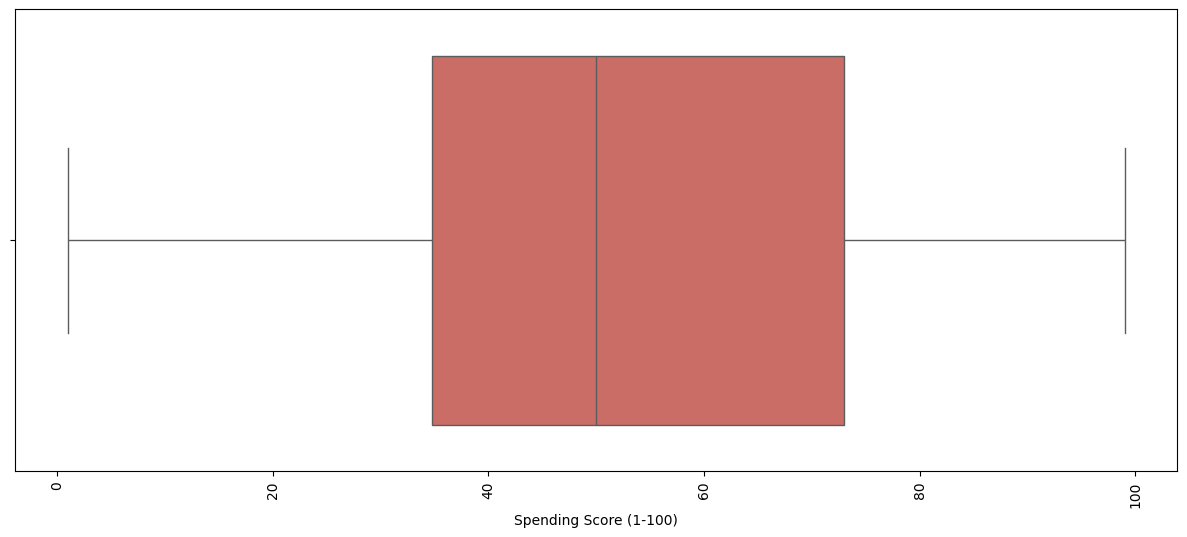

In [53]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

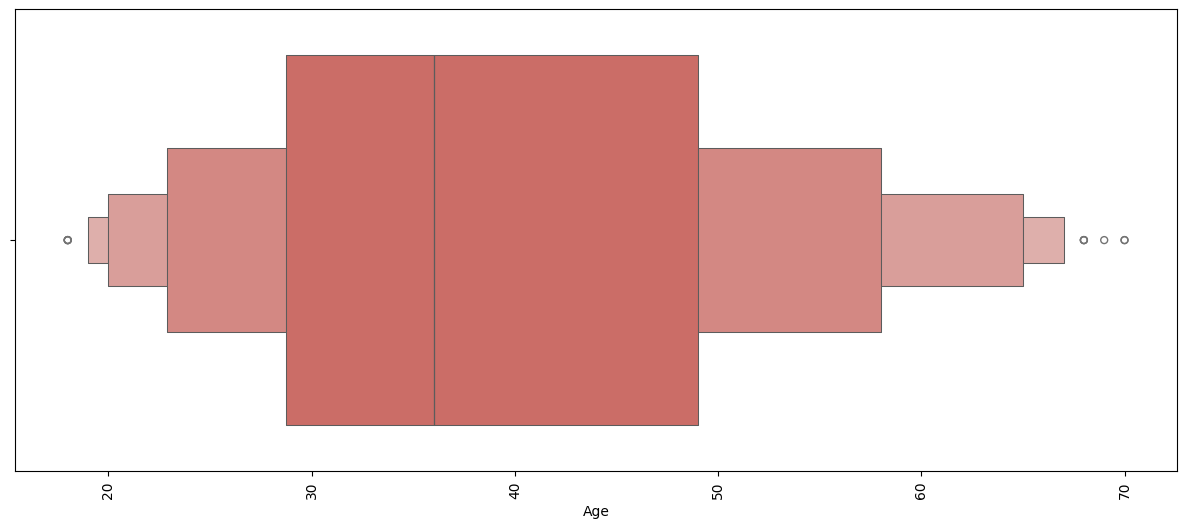

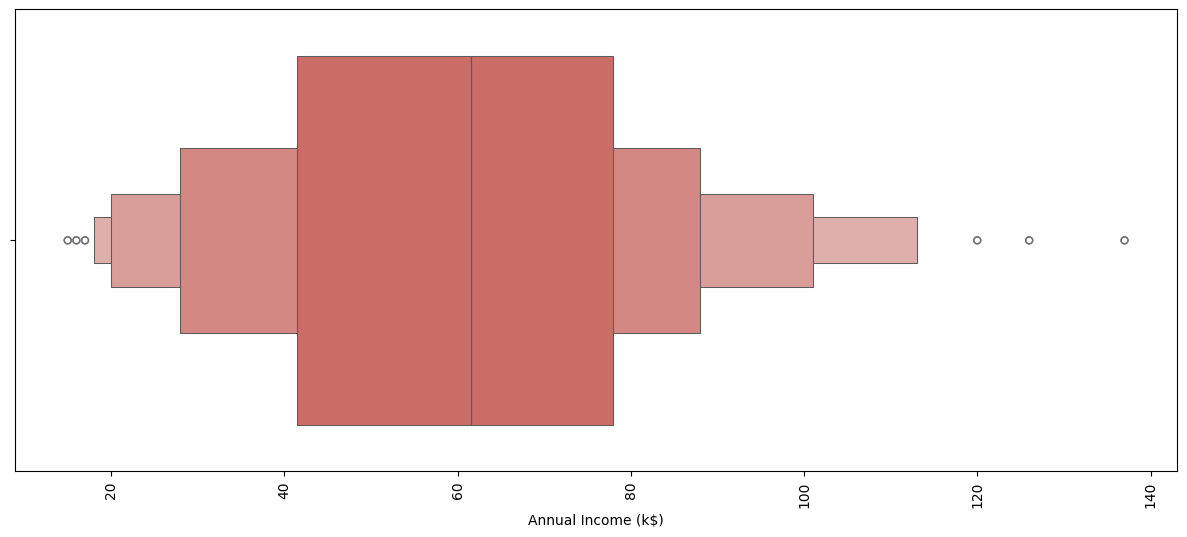

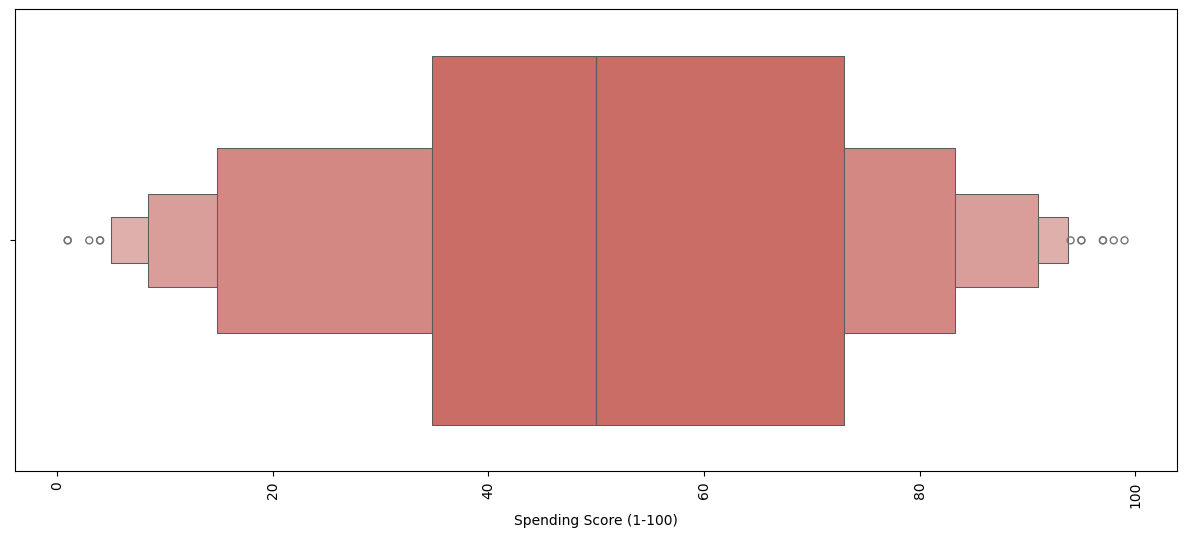

In [54]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

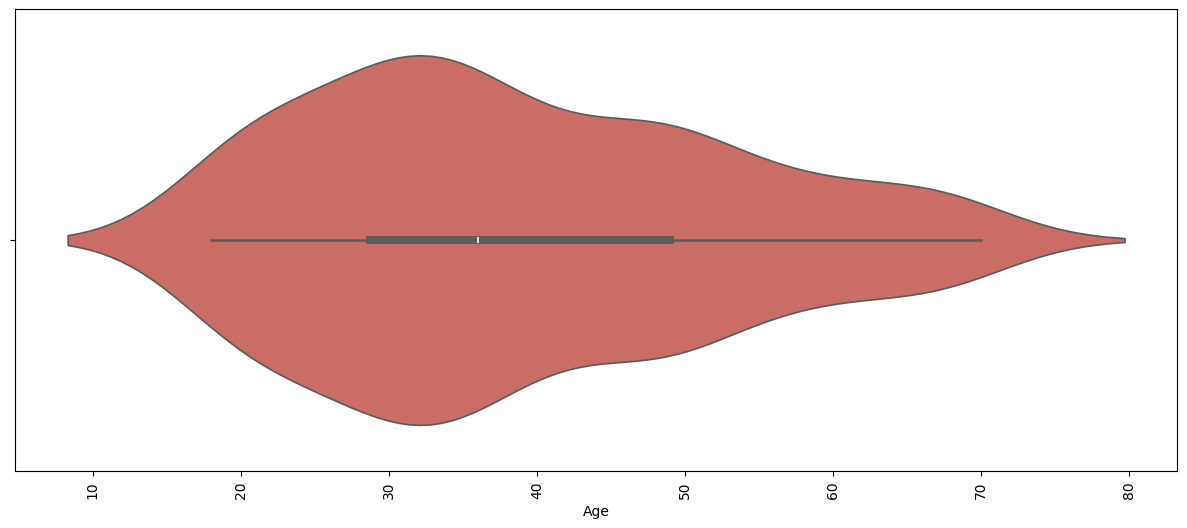

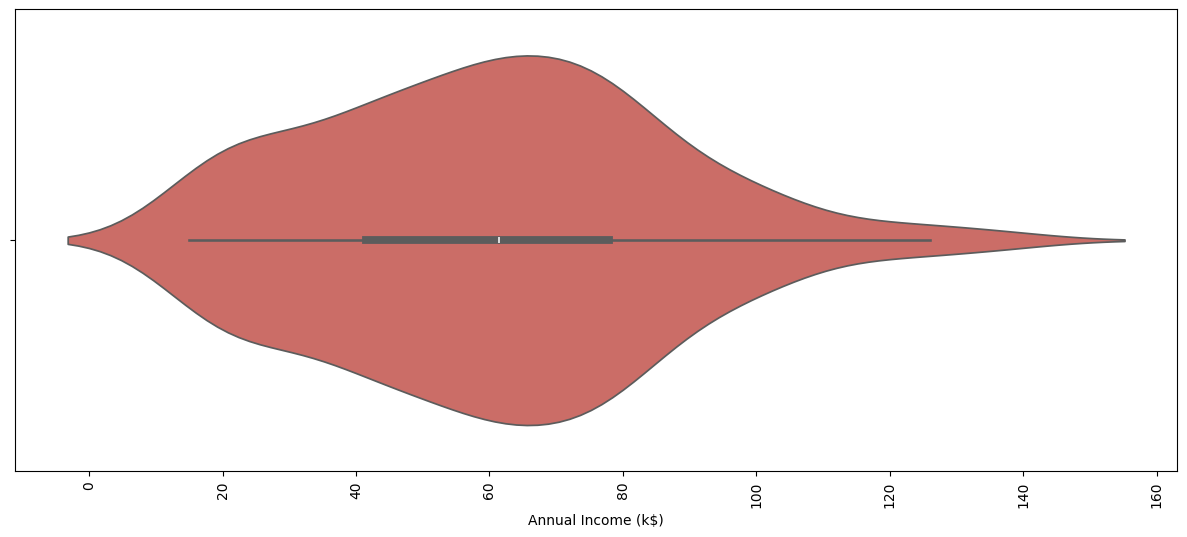

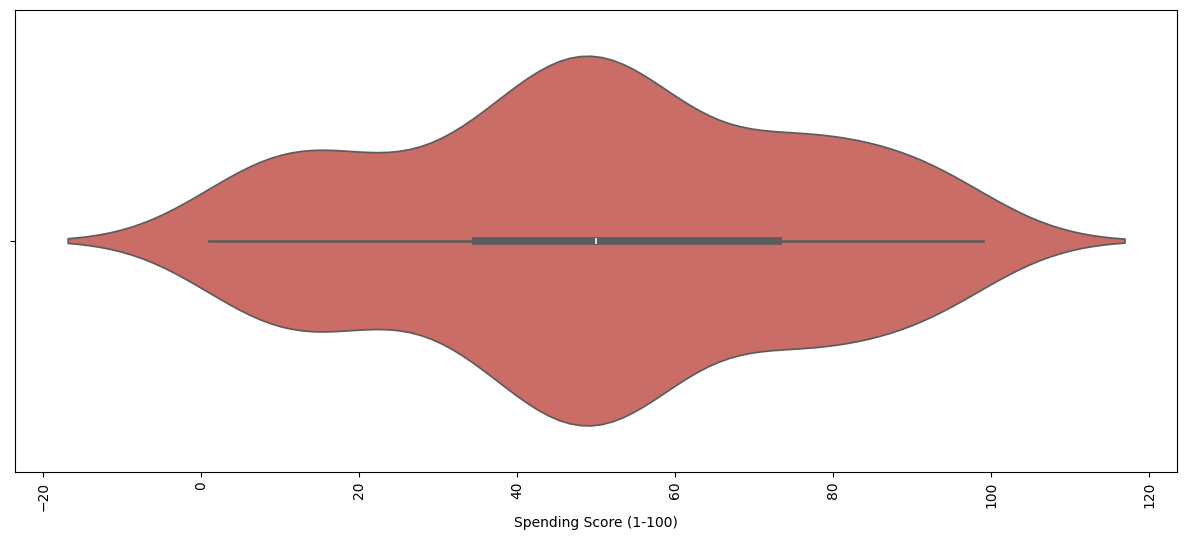

In [48]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

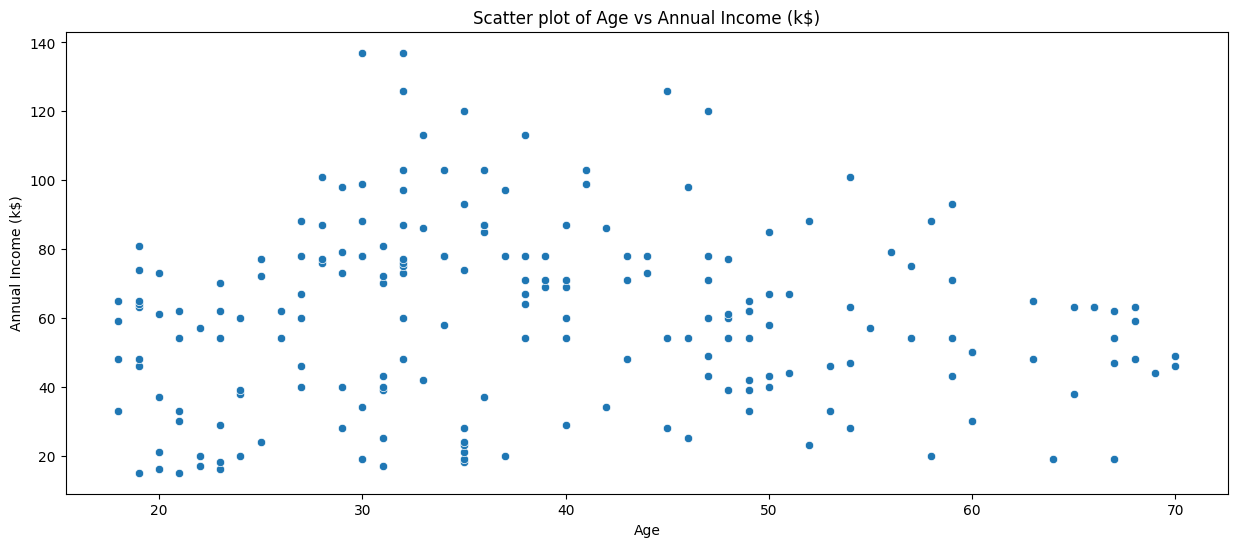

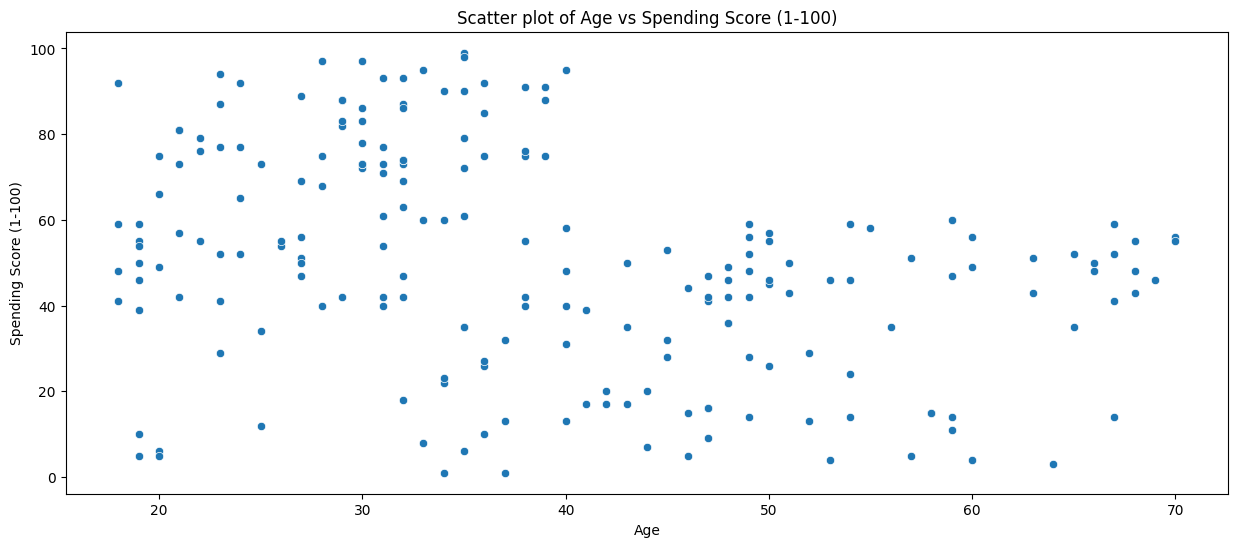

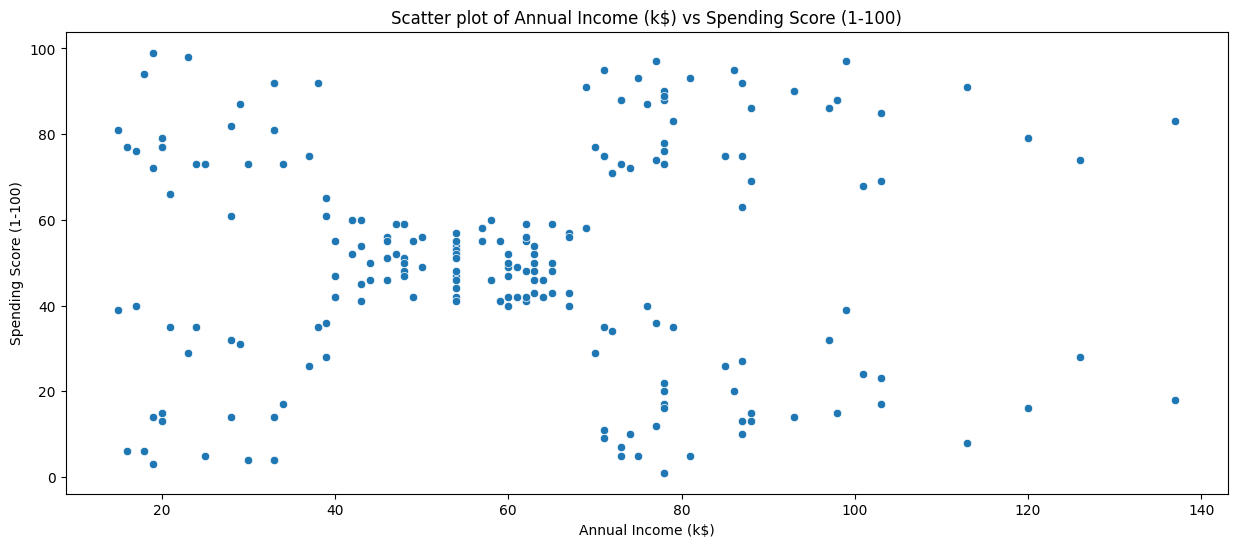

In [49]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

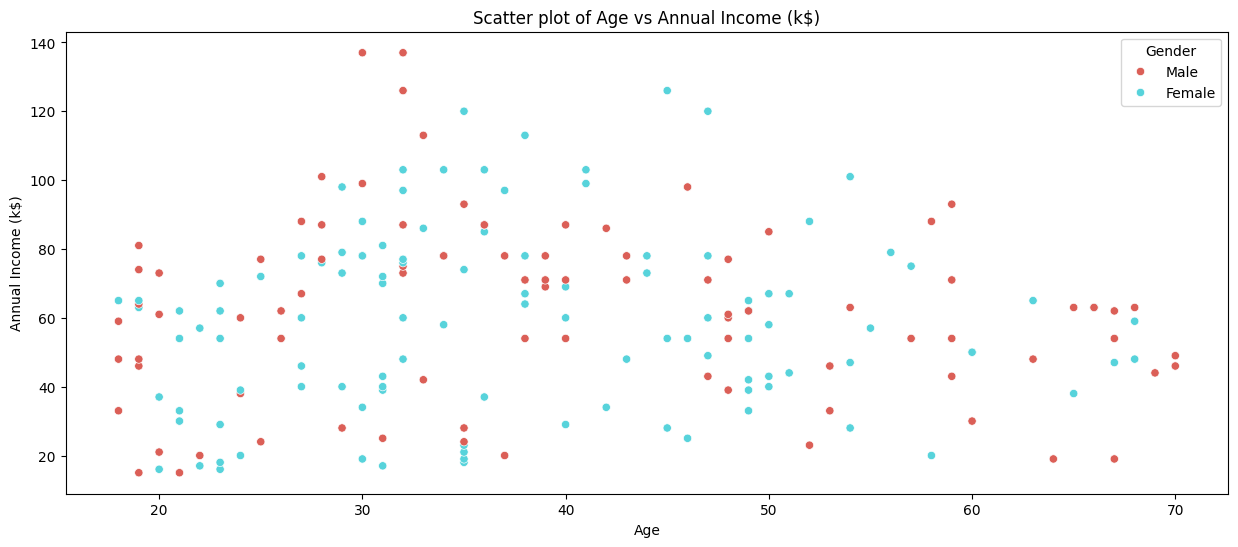

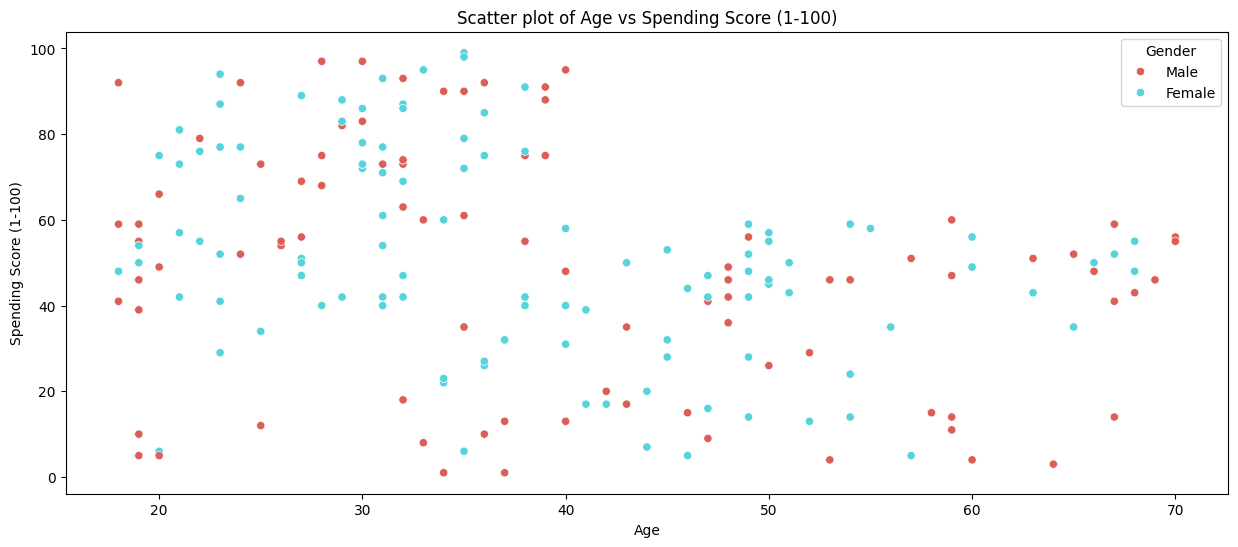

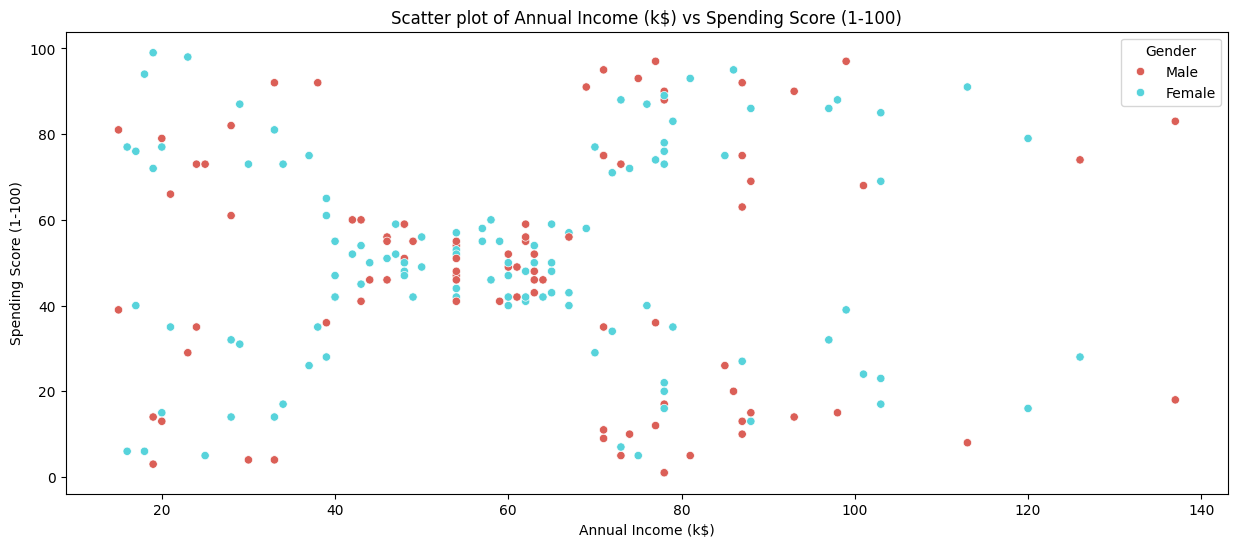

In [51]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous[i], y=continuous[j], data=df, hue = 'Gender', palette='hls')
        plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

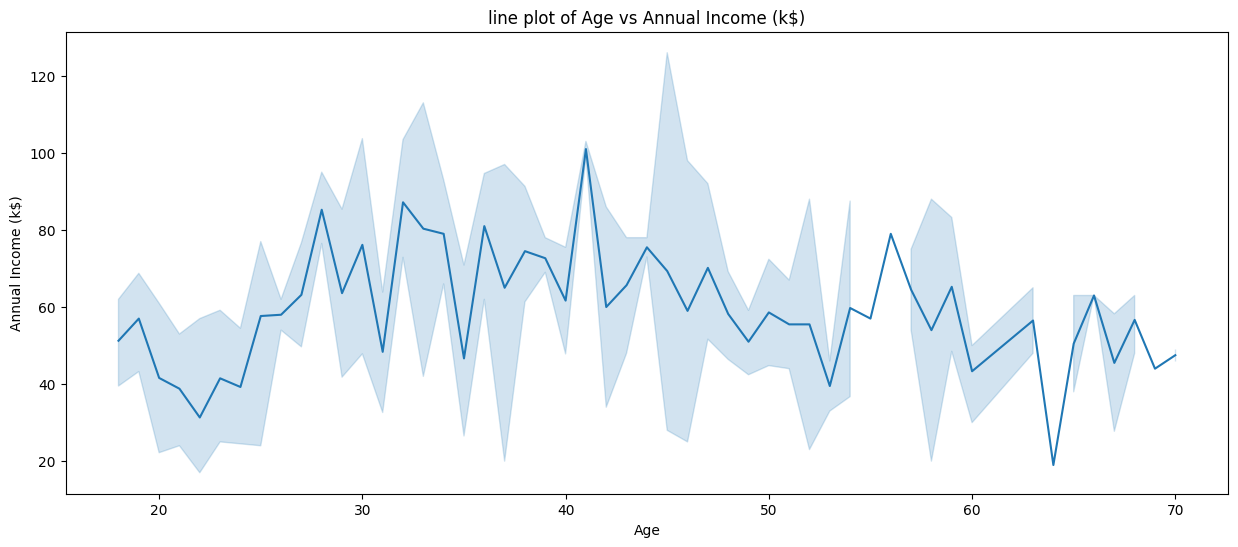

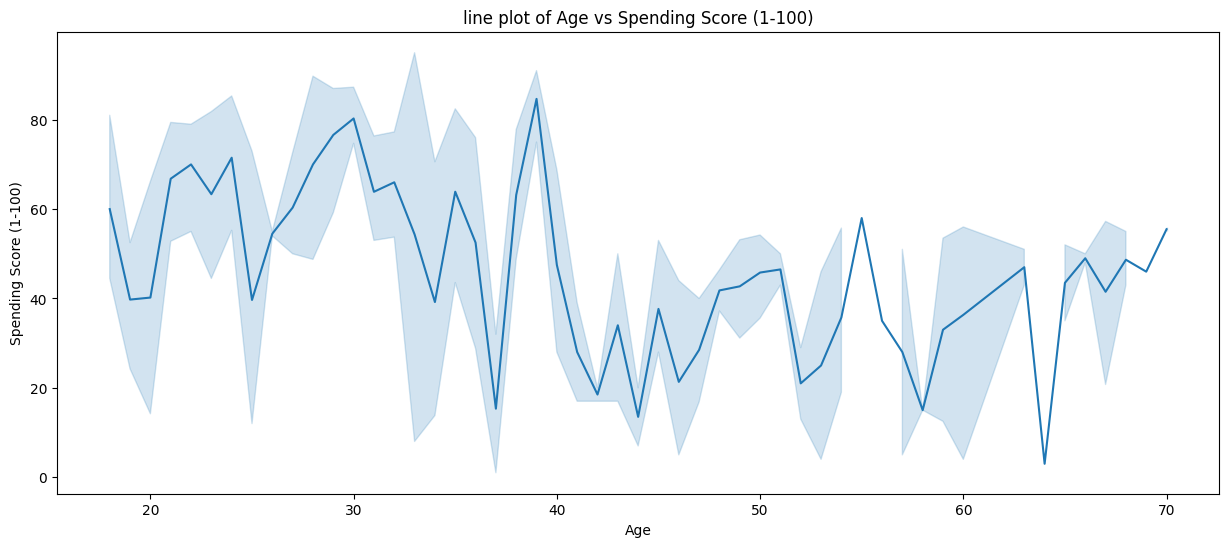

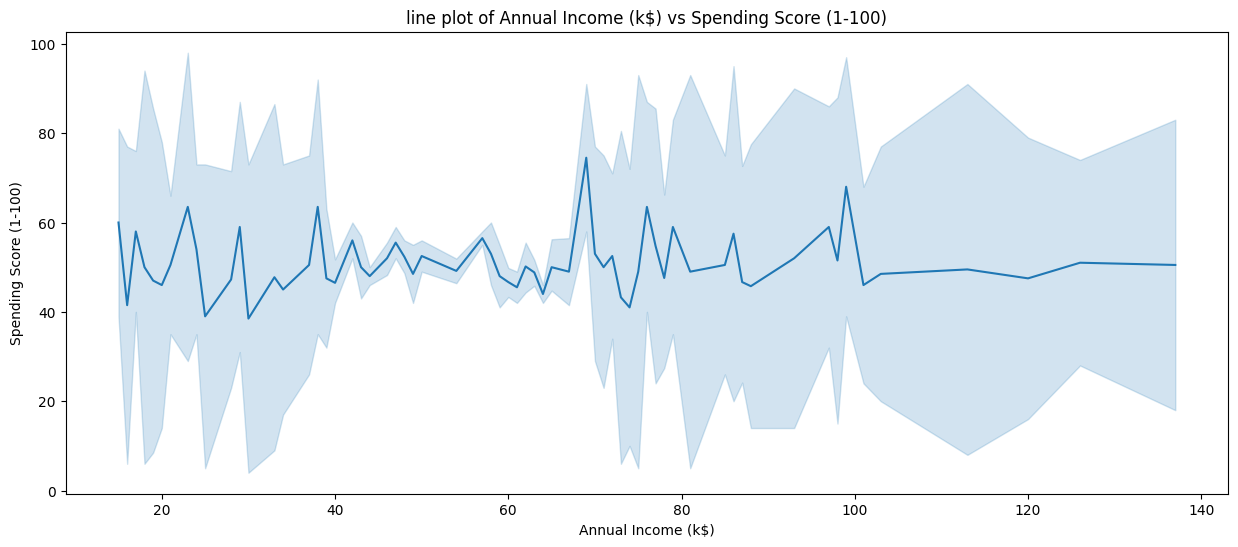

In [50]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'line plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

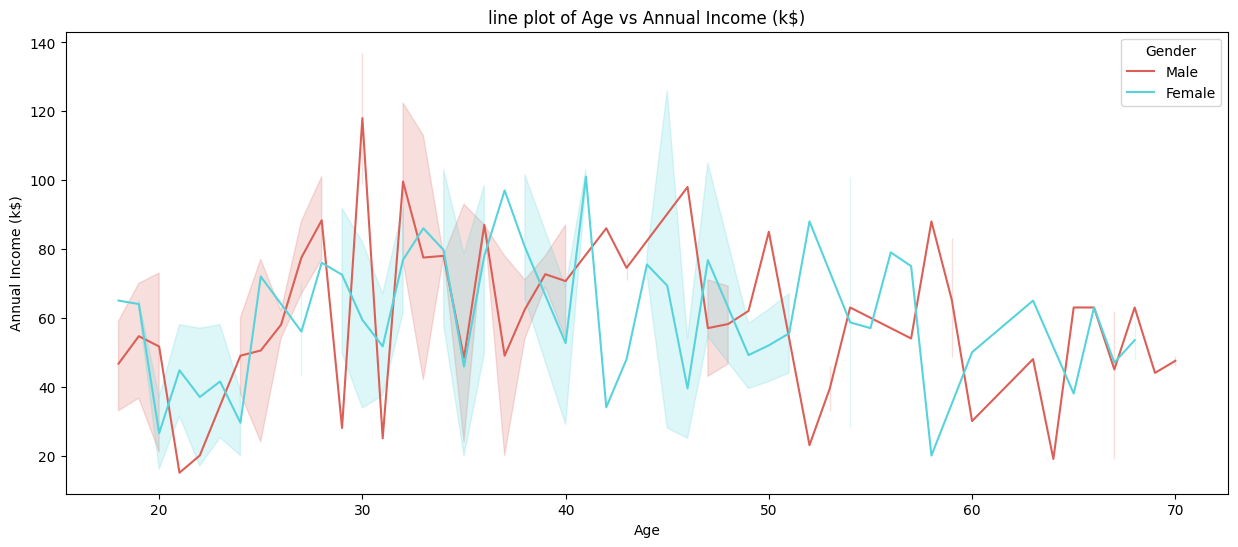

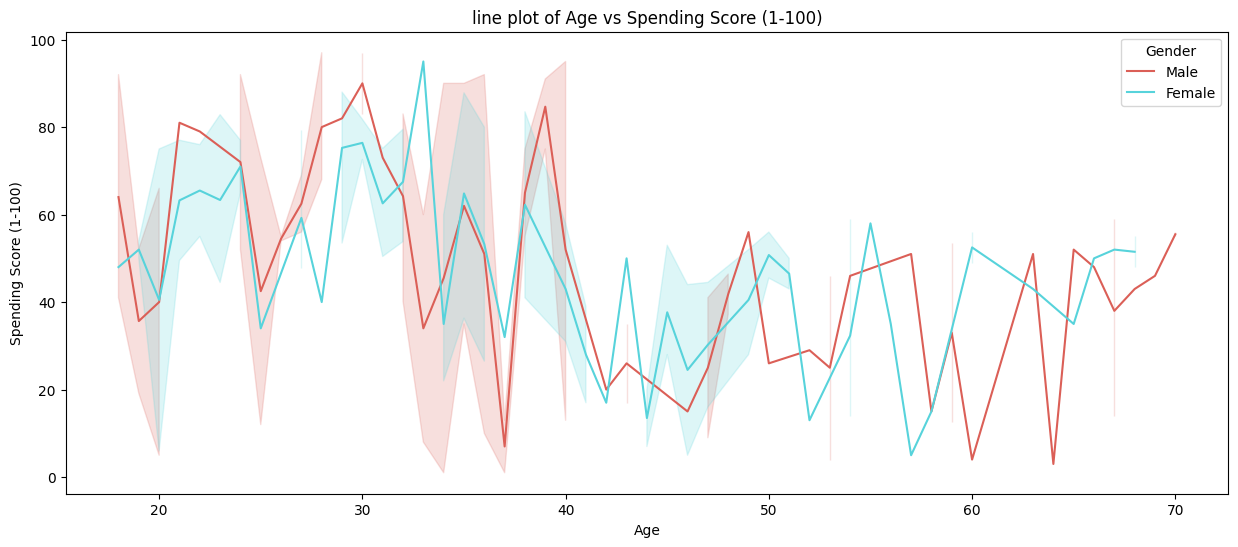

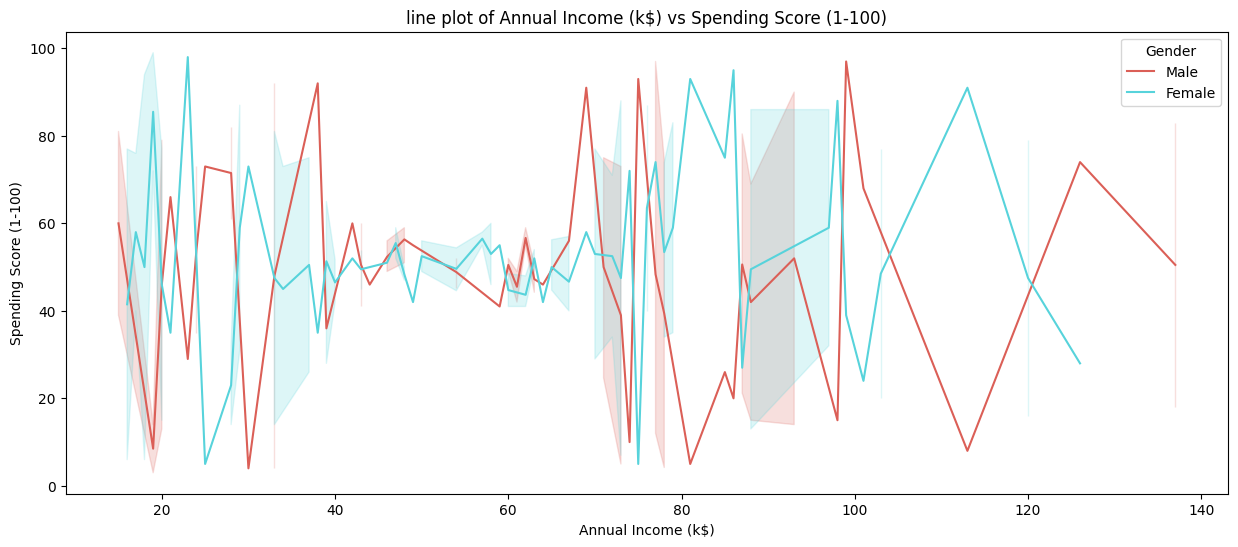

In [52]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=continuous[i], y=continuous[j], data=df, hue = 'Gender', palette='hls')
        plt.title(f'line plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

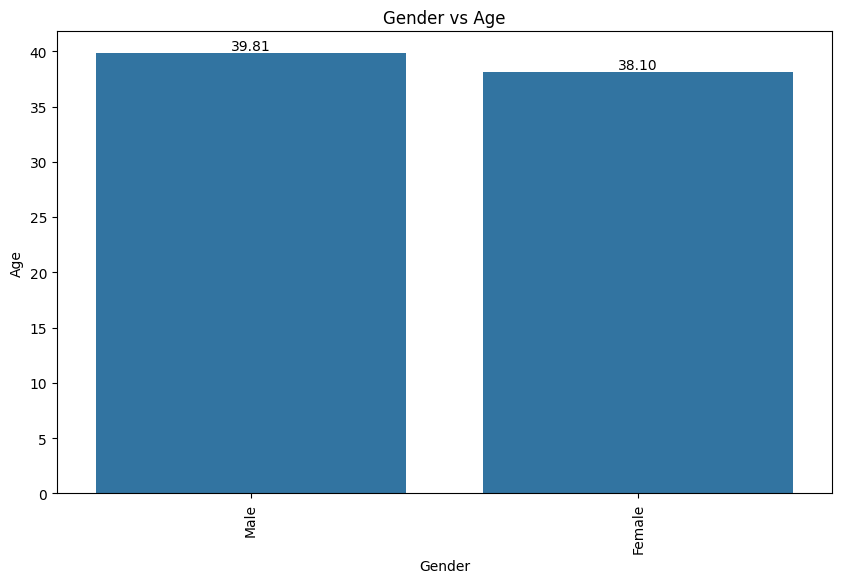

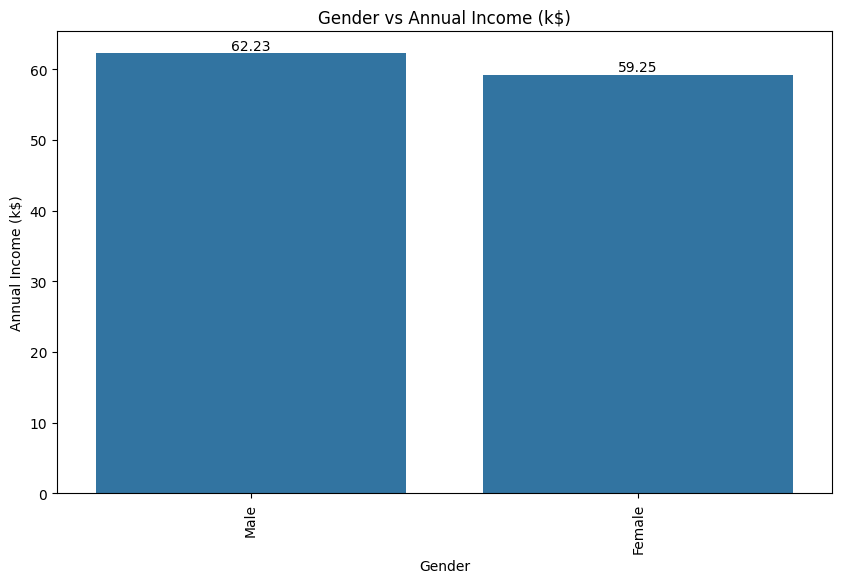

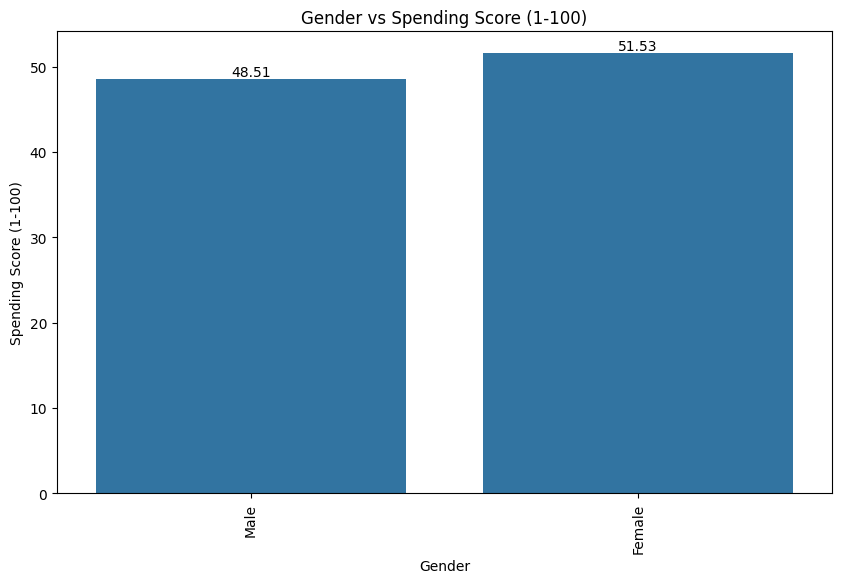

In [55]:
for dis in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=dis, y=cont, ci=None)
        plt.title(f'{dis} vs {cont}')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

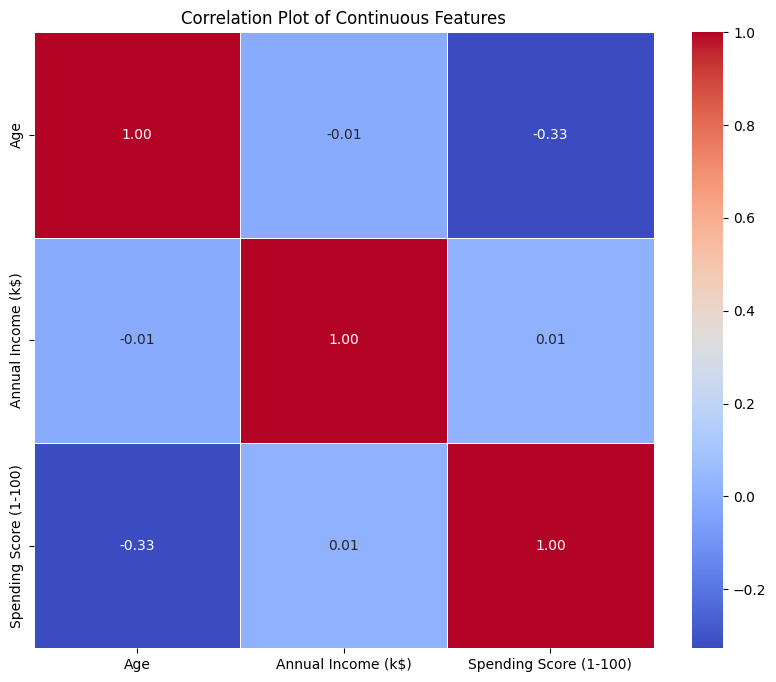

In [58]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [59]:
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [60]:
table = pd.pivot_table(df, index = 'Gender')

In [61]:
table

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [62]:
table = pd.pivot_table(df, index = 'Gender', aggfunc = 'min')

In [63]:
table

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,18,16,5
Male,18,15,1


In [64]:
table = pd.pivot_table(df, index = 'Gender', aggfunc = 'max')

In [65]:
table

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,68,126,99
Male,70,137,97


In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split

In [70]:
scalar=StandardScaler()

In [71]:
scaled_df=scalar.fit_transform(df[continuous])

In [72]:
scaled_df

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [73]:
df1 = df[continuous]

In [74]:
df1

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [75]:
scaled_df=scalar.fit_transform(df1)

In [76]:
scaled_df

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
le = LabelEncoder()

In [79]:
df['Gender'] = le.fit_transform(df['Gender'])

In [80]:
df['Gender']

,Gender
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [81]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [85]:
df2 = pd.DataFrame(scaled_df, columns = continuous)

In [86]:
df2

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [87]:
df3 = pd.concat([df['Gender'], df2], axis=1)

In [88]:
df3

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0,-0.276302,2.268791,1.118061
196,0,0.441365,2.497807,-0.861839
197,1,-0.491602,2.497807,0.923953
198,1,-0.491602,2.917671,-1.250054


In [89]:
df2['Gender'] = df['Gender']

In [90]:
df2

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


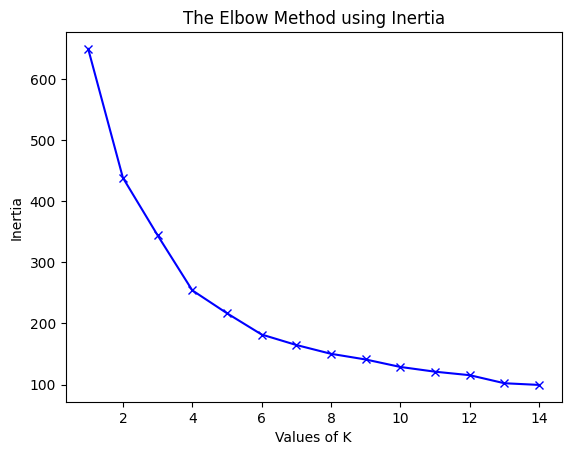

In [92]:
inertia = []

range_val = range(1, 15)

for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(df2)
    inertia.append(kmean.inertia_)

plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [93]:
df3 = df2.copy()

In [95]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(4)
kmeans_model.fit_predict(df2)
df_kmeans = pd.concat([df3, pd.DataFrame({'cluster': kmeans_model.labels_})], axis=1)
df_kmeans


,Age,Annual Income (k$),Spending Score (1-100),Gender,cluster
0,-1.424569,-1.738999,-0.434801,1,3
1,-1.281035,-1.738999,1.195704,1,3
2,-1.352802,-1.700830,-1.715913,0,3
3,-1.137502,-1.700830,1.040418,0,3
4,-0.563369,-1.662660,-0.395980,0,3
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0,0
196,0.441365,2.497807,-0.861839,0,2
197,-0.491602,2.497807,0.923953,1,0
198,-0.491602,2.917671,-1.250054,1,2


<function matplotlib.pyplot.show(close=None, block=None)>

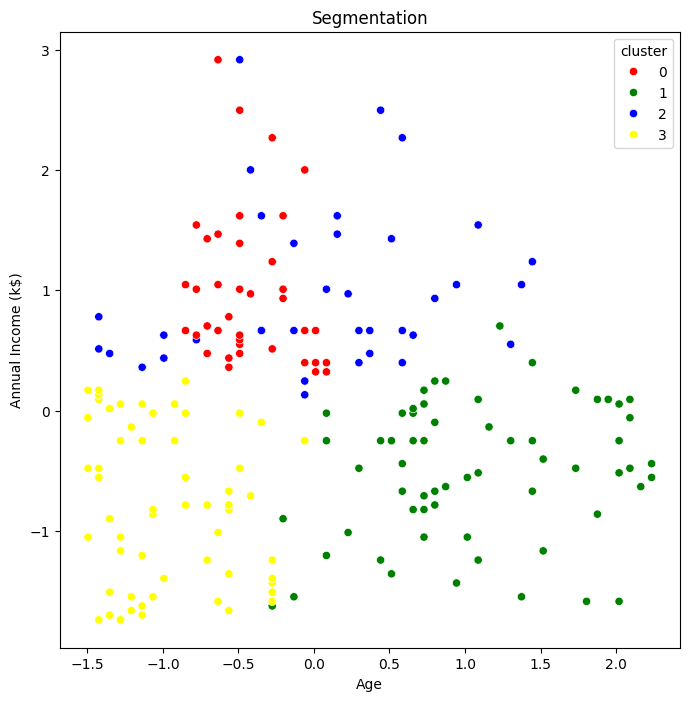

In [101]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="Age",y="Annual Income (k$)",hue="cluster",data=df_kmeans,palette=['red','green','blue','yellow'])
plt.title("Segmentation")
plt.show

In [102]:
from sklearn.metrics import silhouette_score

In [107]:
sill_coeff = silhouette_score(df_kmeans.drop('cluster', axis = 1), df_kmeans["cluster"])

In [108]:
sill_coeff

0.3502702043465398